# [aftershoq]: A guide to creating quantum cascade structures



Author: Martin Franckie, Sept. 2018

This guide will show you how to:

- Create materials and structures
- Load structures from the library
- Generate random structures, in N-dimensions and along the Hilbert curve

Creating materials:

In [1]:
from aftershoq.materials import *
import aftershoq.structure.matpar as mp

well = InGaAs(x = 0.68)
barr = AlInAs(x = 0.665)

print ( "CBO = " + str(barr.params["Ec"] - well.params["Ec"]) )

print( str(well) + " parameters:\n")
for key in well.params:
        print(key + " = " + str(well.params[key]))
        
print( "\n" + str(barr) + " parameters (x=" + str(barr.x) + "):\n")
for key in barr.params:
        print(key + " = " + str(barr.params[key]))


CBO = 0.9582051500000001
Ga_0.68InAs parameters:

meff = 0.03713984
Ec = -0.6196160000000001
Eg = 0.6658447999999999
Ep = 21.982048
Valloy = -0.1940992
ELO = 0.0318608
ETO = 0.0
eps0 = 14.541792000000001
epsinf = 11.8488
Vdef = -6.316735999999999
vlong = 4118.0
massdens = 5563.84
molV = 0.0522624
lattconst = 5.928604

Al_0.665InAs parameters (x=0.665):

meff = 0.097544025
Ec = 0.33858915
Eg = 2.0445875000000004
Ep = 22.90404775
Valloy = 0.41926255
ELO = 0.043233
ETO = 0.0
eps0 = 11.7484
epsinf = 9.47375
Vdef = -1.3899149999999998
vlong = 1283.05
massdens = 1902.7999999999997
molV = 0.018625999999999997
lattconst = 5.794162


Reproducing plot of Keita Ohtani <i>et al</i>., Appl. Phys. Lett <b>103</b>, 041103 (2013)
(https://doi.org/10.1063/1.4816352)

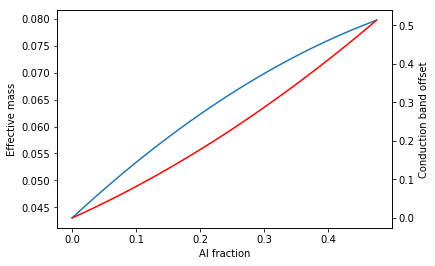

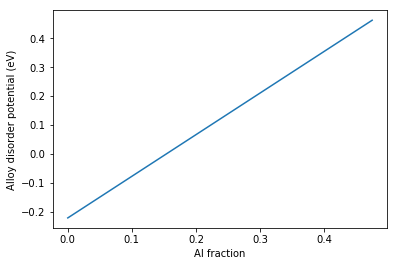

In [2]:
%matplotlib inline
from matplotlib import pyplot as pl
from matplotlib.pyplot import axis 

alingaas = AlInGaAs(1)
ingaas = InGaAs()
inalas = AlInAs()

N = 100
    
ec = []
va = []
m = []
z = []
x = []
for i in range (0, N):
    z.append( float(i)/float(N) )
    x.append( z[i]*0.48 )
    alingaas.updateAlloy(z[i])
    ec.append(alingaas.params["Ec"]-ingaas.params["Ec"])
    m.append(alingaas.params["meff"])
    va.append(alingaas.params["Valloy"])
    
# reproducing plot from Ohtani APL 2013:
pl.plot(x,m)

pl.xlabel("Al fraction")
pl.ylabel("Effective mass")
ax1 = pl.gca()
ax2 = ax1.twinx()
ax2.plot(x,ec,'r')
pl.ylabel("Conduction band offset")

pl.figure(2)
pl.plot(x,va)
pl.xlabel("Al fraction")
pl.ylabel("Alloy disorder potential (eV)")
pl.show()



Creating structures:

In [3]:
from aftershoq.structure import Structure
from aftershoq.qcls import *

s = Structure()

s.setIFR(0.1, 6.0)

s.addLayerWM(2.0, well)
s.addLayerWM(1.1, barr)

s.addDoping(zi = 0.9, zf = 1.1, density = 2e17, layerindex = 0)

print (s)
print ("Doping layers: " + str(s.dopings) + "\n")

s2 = EV2416()

print(s2)

s2.setIFR(0.2, 6)

print (s2)

[width, Material, eta, lambda] (id=0)
[2.0, Ga_0.68InAs, 0.1, 6.0]
[1.1, Al_0.665InAs, 0.1, 6.0]

Doping layers: [[0.9, 1.1, 2e+17]]

[width, Material, eta, lambda] (id=1)
[3.1, Al_0.25GaAs, 0.1, 10]
[8.5, GaAs, 0.1, 10]
[1.8, Al_0.25GaAs, 0.1, 10]
[8.7, GaAs, 0.1, 10]
[3.0, GaAs, 0.1, 10]
[6.0, GaAs, 0.1, 10]

[width, Material, eta, lambda] (id=1)
[3.1, Al_0.25GaAs, 0.2, 6]
[8.5, GaAs, 0.2, 6]
[1.8, Al_0.25GaAs, 0.2, 6]
[8.7, GaAs, 0.2, 6]
[3.0, GaAs, 0.2, 6]
[6.0, GaAs, 0.2, 6]



Generating random structures along a Hilbert curve:

In [4]:
from aftershoq.structure import Sgenerator

# Allows change of x in the barriers by ±10% (independently)
dx = [0.1, 0.0, 0.1, 0.0, 0.0, 0.0]

# Allows change of layer widths by ±1 nm
dw = [1.,1.,1.,1.,1.,1.]

# Allows change of doping start and end positions by ±0.5 nm
# and density by ±1e17 cm^-3
ddop = [0.5, 0.5 , 1e17]

sg = Sgenerator( s2, dw, dx, ddop )
    
# generate N random structures with the distribution in parameters defined above:
N = 5
sg.genRanStructs(N)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")
    
# generate N random structures, along the Hilbert curve with order p
sg.structures = []
p = 5
coords = sg.genRanHilbertStructs(N, p)

for ss in sg.structures:
    print (ss)
    print ("doping: " + str(ss.dopings[0]) + "\n")

[width, Material, eta, lambda] (id=2)
[3.2032240091143613, Al_0.25GaAs, 0.2, 6]
[7.643699205955633, GaAs, 0.2, 6]
[1.6315657393689087, Al_0.25GaAs, 0.2, 6]
[8.400748878897796, GaAs, 0.2, 6]
[2.919943682169161, GaAs, 0.2, 6]
[6.290084493867312, GaAs, 0.2, 6]

doping: [20.8792378333367, 23.79918151550586, 2.5084130724549846e+17]

[width, Material, eta, lambda] (id=3)
[2.30794063269543, Al_0.25GaAs, 0.2, 6]
[9.13652654204105, GaAs, 0.2, 6]
[2.112287535897507, Al_0.25GaAs, 0.2, 6]
[7.926646033633734, GaAs, 0.2, 6]
[2.137725322193664, GaAs, 0.2, 6]
[5.186310216500076, GaAs, 0.2, 6]

doping: [21.483400744267723, 23.621126066461386, 1.4435964137122333e+17]

[width, Material, eta, lambda] (id=4)
[3.8434108017932855, Al_0.25GaAs, 0.2, 6]
[9.295890788765949, GaAs, 0.2, 6]
[1.537142059285733, Al_0.25GaAs, 0.2, 6]
[8.717024530540845, GaAs, 0.2, 6]
[3.294738883623803, GaAs, 0.2, 6]
[5.46541489826989, GaAs, 0.2, 6]

doping: [23.393468180385813, 26.688207064009617, 1.7012079042747373e+17]

[width, Ma